In [2]:
import sklearn
import mglearn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

canser = load_breast_cancer()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 主成成分分析（principal component analysis）

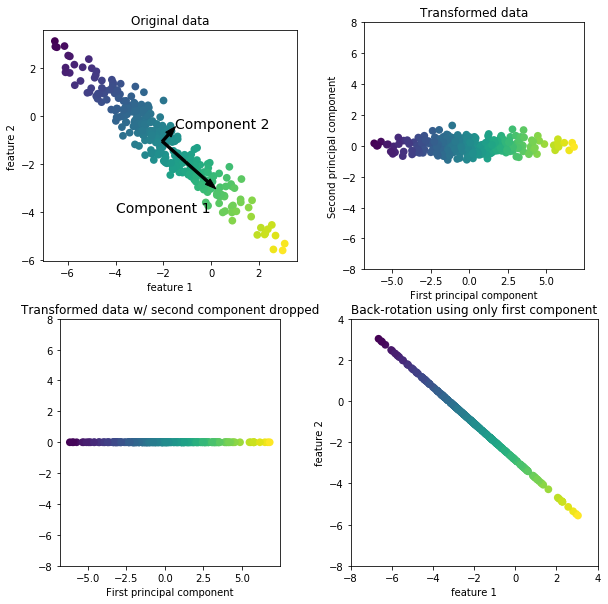

In [3]:
mglearn.plots.plot_pca_illustration()

左上图中为原始数据可视化图像，算法找到包含信息最多（方差最大）的一个方向，标记为"成分1"，之后找到与这个方向正交且包含信息最多的一个方向，这样找到的方向被称为主成分。  
右上图将数据减去平均值，旋转使第一主成分与x轴平行，第二主成分与y轴平行。  
左下图为仅保留第一主成分进行pca降维的结果。  
右下图为将数据旋转回原先位置，再加上平均值的结果。 

## PCA 应用于canser数据集

### 查看每个维度的数据分布

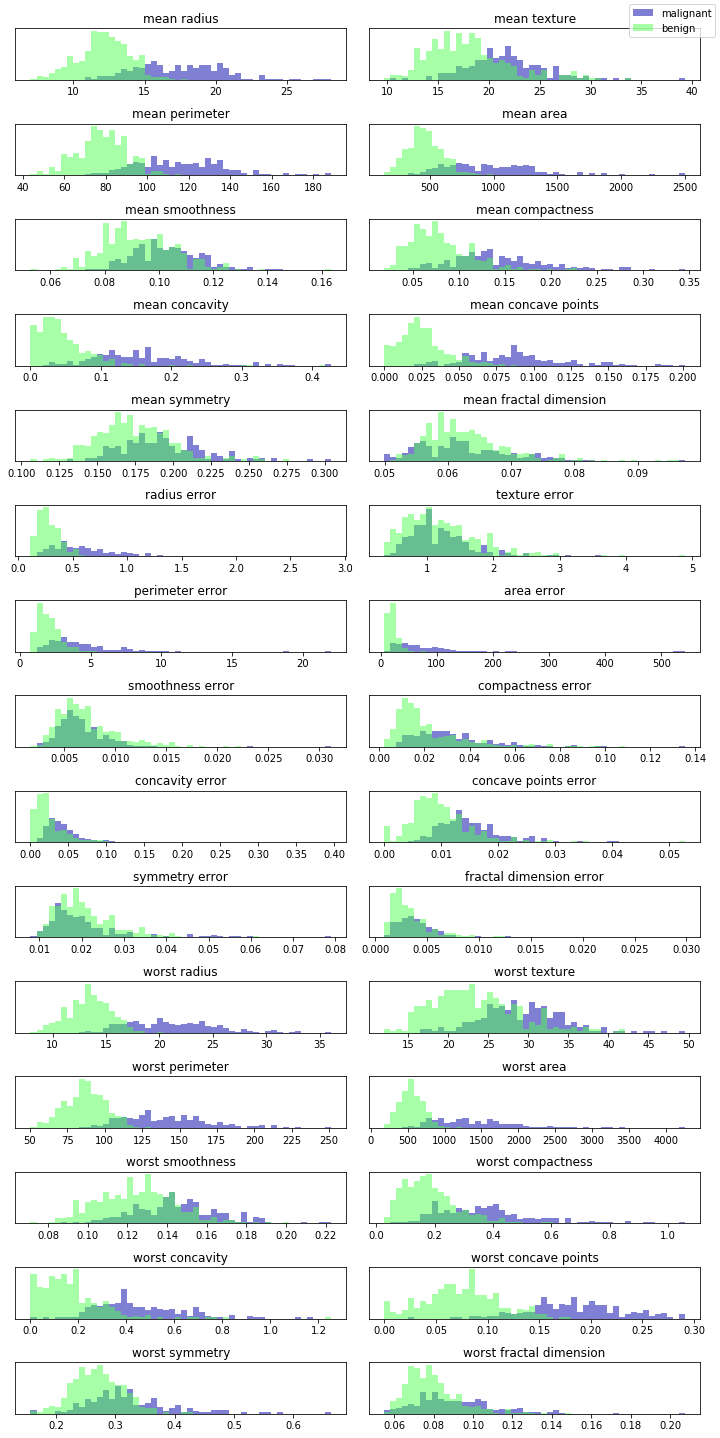

In [4]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = canser.data[canser.target == 0]
benign = canser.data[canser.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(canser.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(canser.feature_names[i])
    ax[i].set_yticks(())

fig.legend(['malignant', 'benign'], loc='upper right')
fig.tight_layout()
plt.show()

### PCA降维、可视化数据

Original data shape: (569, 30)
Reduced data shape: (569, 2)


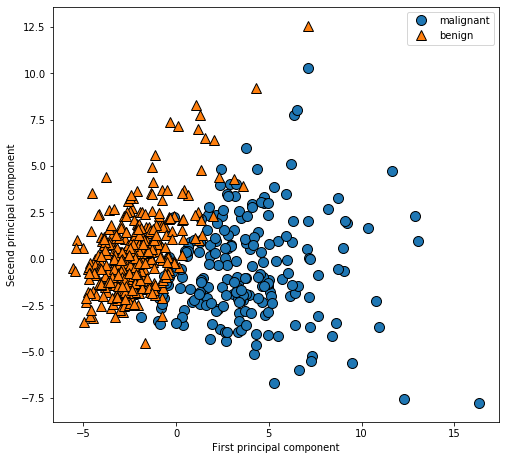

In [5]:
# 标准化数据
from sklearn.preprocessing import StandardScaler

X_scalled = StandardScaler().fit(canser.data).transform(canser.data)

# 保留前两个主成分
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_scalled)

X_pca = pca.transform(X_scalled)

print('Original data shape:', X_scalled.shape)
print('Reduced data shape:', X_pca.shape)

# 绘制图像
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], canser.target)
plt.legend(canser.target_names)
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Secend principal component')
plt.show()

In [6]:
print('PCA component shape:', pca.components_.shape)
print('PCA components:\n', pca.components_)

component_1 = pca.components_[0]
component_2 = pca.components_[1]

PCA component shape: (2, 30)
PCA components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


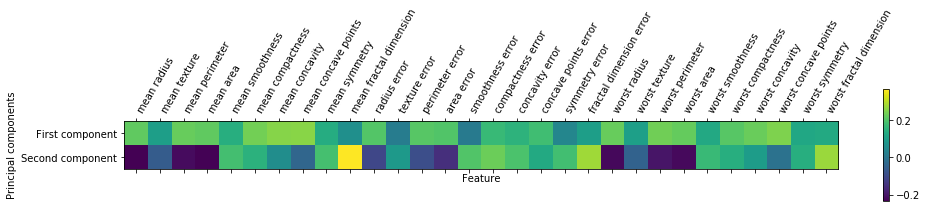

In [7]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(canser.feature_names)),  canser.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal components')
plt.show()

### PCA特征提取

加载LFW (Labled Faces in the Wild)人脸数据集  
数据集下载慢,具体过程见书P113

# 非负矩阵分解(non-negative matrix factorization NMF)

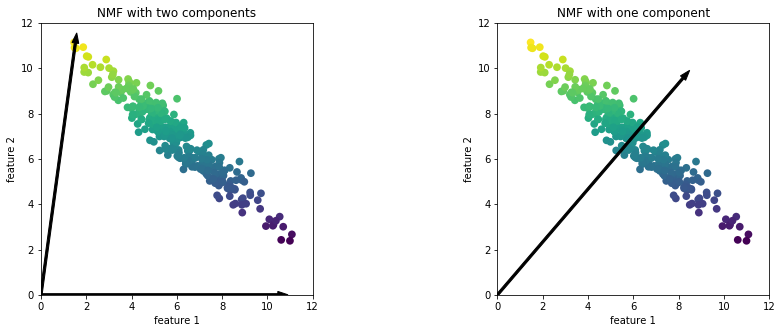

In [8]:
mglearn.plots.plot_nmf_illustration()

## 信号数据的NMF

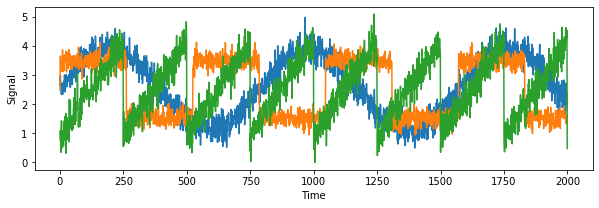

shape of mixed signals: (2000, 100)


In [9]:
# 加载信号数据
signals = mglearn.datasets.make_signals()
plt.figure(figsize=(10,3))
plt.plot(signals, '-')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()

# 将数据混合为100维
mix_matrix = np.random.RandomState(0).uniform(size=(100,3))
mixed_signals = np.dot(signals, mix_matrix.T)

print('shape of mixed signals:', mixed_signals.shape)

### NMF还原信号

由下图课可见,NMF非负矩阵分解适合于叠加信号的区分

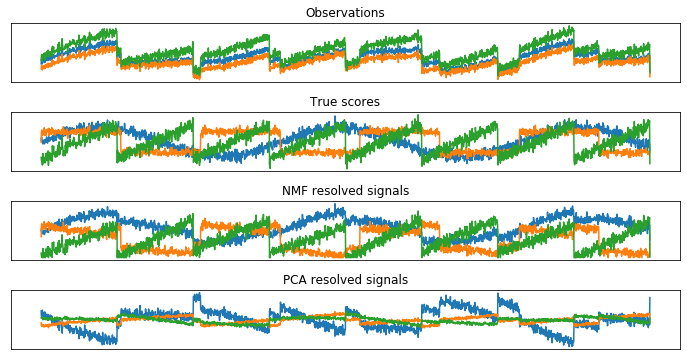

In [10]:
from sklearn.decomposition import NMF,PCA

# nmf 还原信号结果
nmf = NMF(n_components=3, random_state=42)
nmf_signals = nmf.fit_transform(mixed_signals)

# 对比pca还原信号结果
pca = PCA(n_components=3)
pca_signals = pca.fit_transform(mixed_signals)

# 绘制结果
models = [mixed_signals, signals, nmf_signals, pca_signals]
names = ['Observations', 'True scores', 'NMF resolved signals', 'PCA resolved signals']

fig, axes = plt.subplots(4, figsize=(12,6), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

plt.show()

# 流形学习

- 流形学习主要用于数据可视化,很少用来生成两个以上的新特征
- 一些算法(包括t-SNE)不能用于新数据,即不能用于测试集降维,因此在监督学习中很少使用

## t-SNE 应用于手写数字图像

### 加载图像

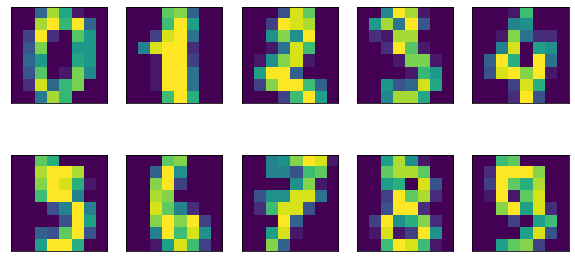

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

plt.show()


### PCA可视化效果

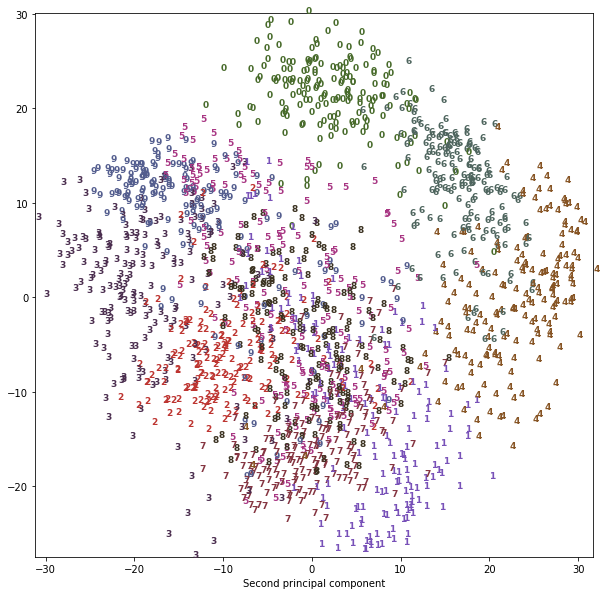

In [34]:
pca = PCA(n_components=2)
# pca 降维
digits_pca = pca.fit_transform(digits.data)

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
          '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})

plt.xlabel('First principal component')
plt.xlabel('Second principal component')
plt.show()

### t-SNE可视化效果

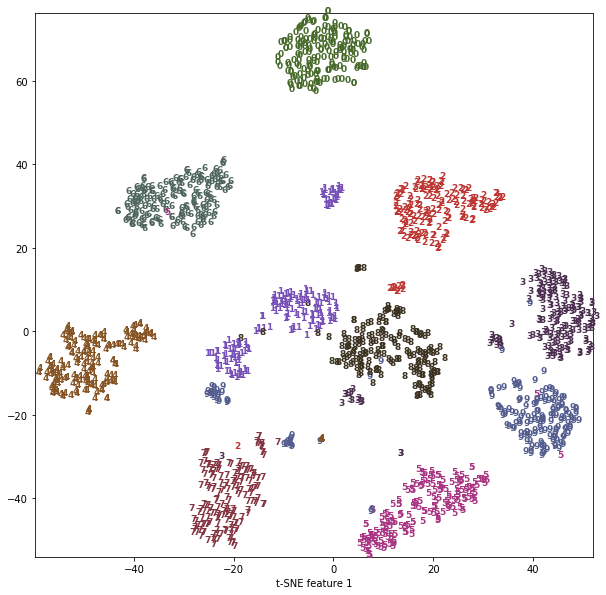

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=2)
# t-sne 降维
digits_tsne = tsne.fit_transform(digits.data)

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
          '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})

plt.xlabel('t-SNE feature 0')
plt.xlabel('t-SNE feature 1')
plt.show()